In [25]:
import pandas as pd
import csv
import numpy as np
df=pd.read_csv(r'C:\Users\hp\Datascience\Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [18]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [22]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [27]:
import seaborn as sns
df_visualization_nominal=df[["rank","discipline","sex"]].copy()
df_visualization_nominal.columns


Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex'], dtype='object')

Male      358
Female     39
Name: sex, dtype: int64


Male      358
Female     39
Name: sex, dtype: int64


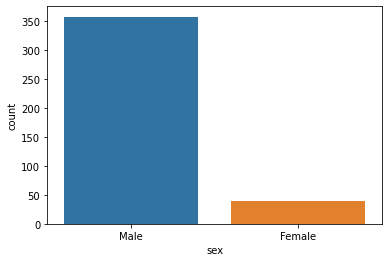

In [31]:
ax=sns.countplot(x="sex",data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


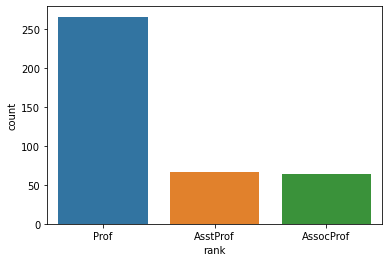

In [33]:
ax=sns.countplot(x="rank",data=df_visualization_nominal)
print(df_visualization_nominal["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


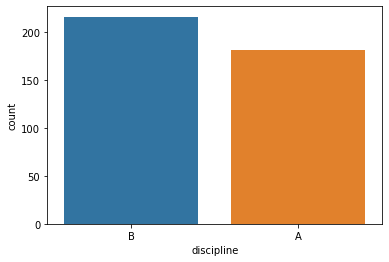

In [34]:
ax=sns.countplot(x="discipline",data=df_visualization_nominal)
print(df_visualization_nominal["discipline"].value_counts())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


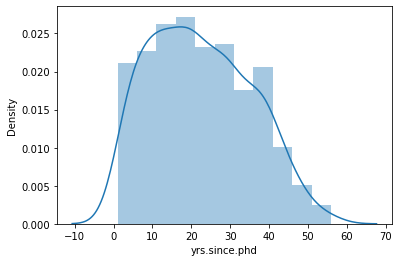

In [40]:
df_visualization_continuous=df[["yrs.since.phd","yrs.service"]].copy()
ax=sns.distplot(df_visualization_continuous["yrs.since.phd"],kde=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


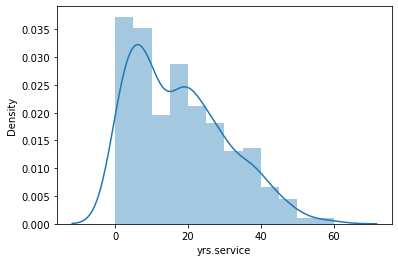

In [41]:

ax=sns.distplot(df_visualization_continuous["yrs.service"],kde=True)

In [45]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [46]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

In [47]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [48]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

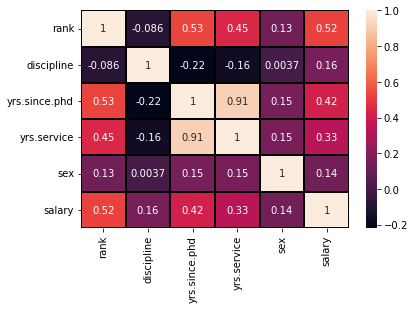

In [51]:
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black")

In [52]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

<AxesSubplot:>

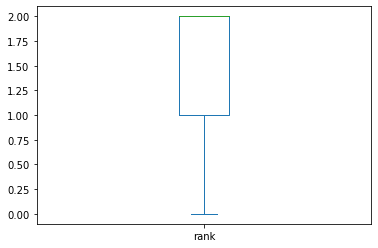

In [54]:
df["rank"].plot.box()


<AxesSubplot:>

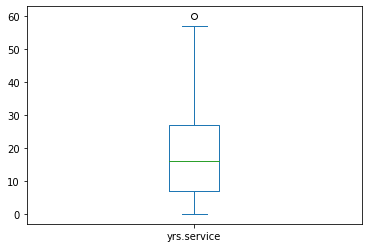

In [55]:
df["yrs.service"].plot.box()

<AxesSubplot:>

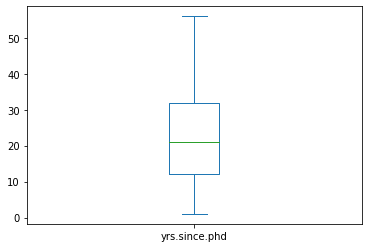

In [56]:
df["yrs.since.phd"].plot.box()

<AxesSubplot:>

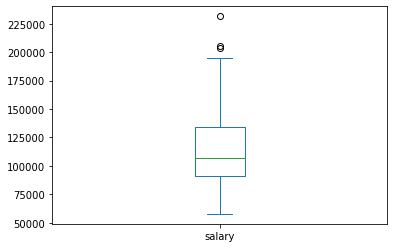

In [57]:
df["salary"].plot.box()

In [59]:
df.shape


(397, 6)

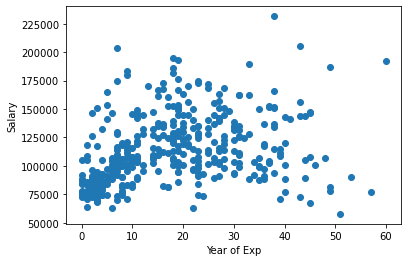

In [66]:
plt.scatter( df['yrs.service'] ,df['salary'] )
plt.xlabel('Year of Exp')
plt.ylabel('Salary')
plt.show()

In [69]:
df_new_z=df[(z>2).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [67]:
X=df.drop("salary",axis=1)
Y=df["salary"]

In [92]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error





X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

lr = LinearRegression()
lr.fit(X_train , Y_train)
pred_train = lr.predict(X_train)
pred_test=lr.predict(X_test)
    
lr.score(X_test , Y_test)
    
    

0.39087352802385156

In [89]:
pred = lr.predict(X_test)
pred

array([141377.51525665, 129248.21575335, 135068.30987947, 124515.99743953,
        89254.17804762, 123900.44450617,  88543.38044848, 135776.79419788,
        88090.1592224 ,  94030.81639584, 121029.5370879 , 131120.71889698,
       131027.78751193,  84403.07849834, 108894.64146055, 118701.49943745,
        80776.95344653, 126222.88603257,  76351.44346106, 121976.14716856,
       127398.09710588, 135908.83200421, 140427.27337473, 127617.47017322,
       133004.4142887 ,  86695.57508175, 121732.42528227, 125767.35152576,
       131834.79933943, 110525.38704067, 114500.95864337, 132537.6875338 ,
       130429.0229507 , 128573.30817919,  78223.9466047 , 119843.1337665 ,
       111689.4058659 ,  88076.65369358, 133004.4142887 , 120574.00258108,
       114500.95864337,  79727.90154459,  95563.38342481, 127848.03548865,
       122730.8295569 , 146725.28650383, 111464.43667451, 115901.13890806,
       103537.99124602,  91511.66880918, 126706.4011596 ,  85512.45460367,
       133240.57572817, 1

In [93]:
diff = Y_test - pred
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,125196.0,141377.515257,-16181.515257
1,107500.0,129248.215753,-21748.215753
2,145200.0,135068.309879,10131.690121
3,131205.0,124515.997440,6689.002560
4,105128.0,89254.178048,15873.821952
...,...,...,...
75,141136.0,132734.676105,8401.323895
76,103450.0,120096.083578,-16646.083578
77,107008.0,88090.159222,18917.840778
78,90215.0,87392.867152,2822.132848


0.271039118441054